### DSA_DATA를 활용하여 transformer 사용

In [6]:
import numpy as np
import keras
from keras import layers
import pandas as pd

In [10]:
df = pd.read_csv("/Users/user/Downloads/DSA_features.csv")

In [12]:
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [14]:
df.columns

Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_std', 'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max',
       'LL_zmag_min', 'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity',
       'people'],
      dtype='object', length=272)

In [16]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

T_xacc_mean     0
T_xacc_max      0
T_xacc_min      0
T_xacc_var      0
T_xacc_std      0
               ..
LL_zmag_var     0
LL_zmag_std     0
LL_zmag_skew    0
activity        0
people          0
Length: 272, dtype: int64

In [18]:
df['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

Text(0, 0.5, 'Count')

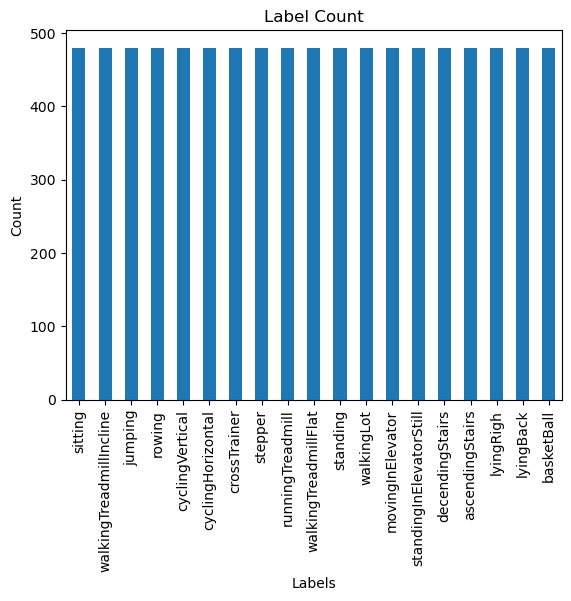

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# 레이블별 갯수 확인
label_counts = df['activity'].value_counts()

# 바 그래프 그리기
label_counts.plot(kind='bar')

# 그래프 제목 및 라벨 설정
plt.title('Label Count')
plt.xlabel('Labels')
plt.ylabel('Count')

In [42]:
df_RA = df.filter(regex='RA_') 
df_LA = df.filter(regex='LA_') 

In [44]:
df_RA.insert(3, 'activity', df['activity'])


In [47]:
df_LA.insert(3, 'activity', df['activity'])

In [49]:
df_RA

,RA_xacc_mean,RA_xacc_max,RA_xacc_min,activity,RA_xacc_var,RA_xacc_std,RA_xacc_skew,RA_yacc_mean,RA_yacc_max,RA_yacc_min,...,RA_ymag_min,RA_ymag_var,RA_ymag_std,RA_ymag_skew,RA_zmag_mean,RA_zmag_max,RA_zmag_min,RA_zmag_var,RA_zmag_std,RA_zmag_skew
0,0.679134,0.75930,0.58542,12,0.001546,0.039324,-0.415694,5.713088,5.8483,5.5956,...,-0.57428,0.000012,0.003401,-0.052190,-0.211136,-0.18401,-0.24523,0.000044,0.006638,-1.153902
1,0.644964,0.73158,0.53064,12,0.001333,0.036508,0.410625,5.795154,5.9546,5.6687,...,-0.57398,0.000005,0.002216,0.222740,-0.206431,-0.18054,-0.23624,0.000032,0.005660,0.458427
2,0.608212,0.67737,0.53546,12,0.000637,0.025244,0.153302,5.833086,5.8918,5.7656,...,-0.57563,0.000004,0.001954,-0.221765,-0.205648,-0.18342,-0.22933,0.000024,0.004868,-0.984915
3,0.591138,0.71177,0.51524,12,0.001349,0.036731,0.525019,5.863846,5.9645,5.7556,...,-0.57858,0.000007,0.002688,0.075011,-0.203739,-0.17999,-0.22958,0.000026,0.005099,0.185634
4,0.558168,0.67190,0.50535,12,0.000626,0.025020,1.076782,5.884745,5.9401,5.8384,...,-0.57996,0.000005,0.002278,-0.219440,-0.203684,-0.17904,-0.22924,0.000027,0.005175,-0.820907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.690373,30.46300,-4.90150,1,47.192912,6.869710,0.650080,2.187710,41.3410,-10.1410,...,-0.89670,0.177217,0.420971,1.232819,-0.120793,0.58641,-0.61373,0.077901,0.279107,0.611462
9116,6.477090,48.54700,-9.96820,1,44.135927,6.643488,1.675812,5.845459,33.7910,-48.3200,...,-0.85305,0.158099,0.397617,1.560701,-0.133269,0.51707,-0.52776,0.058400,0.241661,0.574120
9117,6.309986,27.29900,-8.43140,1,57.018917,7.551087,0.108921,6.342772,27.0570,-6.6706,...,-0.83512,0.126188,0.355229,1.598340,-0.567238,-0.14483,-0.82409,0.023408,0.152998,0.598665
9118,5.020496,30.16600,-20.25100,1,67.001032,8.185416,0.157547,5.824265,27.6300,-19.8830,...,-0.87361,0.174494,0.417725,0.758435,0.211566,0.67931,-0.22328,0.060114,0.245181,0.316989


In [51]:
df_LA['activity'].value_counts()

activity
12    480
18    480
6     480
10    480
4     480
3     480
2     480
15    480
11    480
17    480
13    480
16    480
9     480
14    480
5     480
0     480
8     480
7     480
1     480
Name: count, dtype: int64

In [53]:
df_RA['activity'].value_counts()

activity
12    480
18    480
6     480
10    480
4     480
3     480
2     480
15    480
11    480
17    480
13    480
16    480
9     480
14    480
5     480
0     480
8     480
7     480
1     480
Name: count, dtype: int64

In [55]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'label' 컬럼을 숫자로 변환
df_RA['activity'] = label_encoder.fit_transform(df_RA['activity'])

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()
# 'label' 컬럼을 숫자로 변환
df_LA['activity'] = label_encoder.fit_transform(df_LA['activity'])

/var/folders/y8/jpgs3d8n3jg_g232vtyn_2q80000gn/T/ipykernel_1366/3441972880.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RA['activity'] = label_encoder.fit_transform(df_RA['activity'])
/var/folders/y8/jpgs3d8n3jg_g232vtyn_2q80000gn/T/ipykernel_1366/3441972880.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LA['activity'] = label_encoder.fit_transform(df_LA['activity'])


In [57]:
df_LA['activity'].value_counts()

activity
12    480
18    480
6     480
10    480
4     480
3     480
2     480
15    480
11    480
17    480
13    480
16    480
9     480
14    480
5     480
0     480
8     480
7     480
1     480
Name: count, dtype: int64

In [59]:
df_RA['activity'].value_counts()

activity
12    480
18    480
6     480
10    480
4     480
3     480
2     480
15    480
11    480
17    480
13    480
16    480
9     480
14    480
5     480
0     480
8     480
7     480
1     480
Name: count, dtype: int64

In [61]:
df_RA_X=df_RA.drop('activity',axis=1)
df_RA_X.head()

,RA_xacc_mean,RA_xacc_max,RA_xacc_min,RA_xacc_var,RA_xacc_std,RA_xacc_skew,RA_yacc_mean,RA_yacc_max,RA_yacc_min,RA_yacc_var,...,RA_ymag_min,RA_ymag_var,RA_ymag_std,RA_ymag_skew,RA_zmag_mean,RA_zmag_max,RA_zmag_min,RA_zmag_var,RA_zmag_std,RA_zmag_skew
0,0.679134,0.75930,0.58542,0.001546,0.039324,-0.415694,5.713088,5.8483,5.5956,0.003779,...,-0.57428,0.000012,0.003401,-0.052190,-0.211136,-0.18401,-0.24523,0.000044,0.006638,-1.153902
1,0.644964,0.73158,0.53064,0.001333,0.036508,0.410625,5.795154,5.9546,5.6687,0.001132,...,-0.57398,0.000005,0.002216,0.222740,-0.206431,-0.18054,-0.23624,0.000032,0.005660,0.458427
2,0.608212,0.67737,0.53546,0.000637,0.025244,0.153302,5.833086,5.8918,5.7656,0.000488,...,-0.57563,0.000004,0.001954,-0.221765,-0.205648,-0.18342,-0.22933,0.000024,0.004868,-0.984915
3,0.591138,0.71177,0.51524,0.001349,0.036731,0.525019,5.863846,5.9645,5.7556,0.001423,...,-0.57858,0.000007,0.002688,0.075011,-0.203739,-0.17999,-0.22958,0.000026,0.005099,0.185634
4,0.558168,0.67190,0.50535,0.000626,0.025020,1.076782,5.884745,5.9401,5.8384,0.000471,...,-0.57996,0.000005,0.002278,-0.219440,-0.203684,-0.17904,-0.22924,0.000027,0.005175,-0.820907


In [65]:
df_RA_Y=df_RA['activity']

In [67]:
from sklearn.model_selection import train_test_split

X_train_RA, X_test_RA, y_train_RA, y_test_RA = train_test_split(df_RA_X, 
                                                    df_RA_Y,
                                                    test_size = 0.25, 
                                                    random_state = 21)

In [69]:
df_LA_Y = df_LA['activity']
df_LA_Y.head()

0    12
1    12
2    12
3    12
4    12
Name: activity, dtype: int64

In [71]:
df_LA_X=df_LA.drop('activity',axis=1)
df_LA_X.head()

,LA_xacc_mean,LA_xacc_max,LA_xacc_min,LA_xacc_var,LA_xacc_std,LA_xacc_skew,LA_yacc_mean,LA_yacc_max,LA_yacc_min,LA_yacc_var,...,LA_ymag_min,LA_ymag_var,LA_ymag_std,LA_ymag_skew,LA_zmag_mean,LA_zmag_max,LA_zmag_min,LA_zmag_var,LA_zmag_std,LA_zmag_skew
0,3.403317,3.4875,3.2682,0.001583,0.039790,-0.744647,-8.375713,-8.2927,-8.4821,0.001178,...,0.33748,0.000003,0.001810,-0.215069,0.072273,0.076374,0.067940,0.000004,0.001910,-0.166015
1,3.427302,3.6630,3.3168,0.004305,0.065614,1.000107,-8.397591,-8.3118,-8.5017,0.001098,...,0.33000,0.000017,0.004159,-0.611251,0.074557,0.085184,0.068169,0.000022,0.004643,0.717286
2,3.400870,3.5168,3.3315,0.001007,0.031732,0.978319,-8.439138,-8.3599,-8.5204,0.000684,...,0.33307,0.000002,0.001316,-0.506255,0.075852,0.083227,0.072507,0.000004,0.002106,1.043919
3,3.391002,3.5311,3.2608,0.001792,0.042328,0.117935,-8.441421,-8.3207,-8.5446,0.001862,...,0.33431,0.000002,0.001395,0.155251,0.074878,0.080059,0.069942,0.000006,0.002414,0.242524
4,3.359974,3.4434,3.3069,0.000633,0.025160,1.051627,-8.454854,-8.3202,-8.5561,0.001061,...,0.33631,0.000001,0.001005,-0.299017,0.073398,0.077461,0.070175,0.000002,0.001482,0.606258


In [73]:
from sklearn.model_selection import train_test_split

X_train_LA, X_test_LA, y_train_LA, y_test_LA = train_test_split(df_LA_X, 
                                                    df_LA_Y,
                                                    test_size = 0.25, 
                                                    random_state = 21)

In [75]:
X_train_RA.shape, X_test_RA.shape, y_train_RA.shape, y_test_RA.shape

((6840, 54), (2280, 54), (6840,), (2280,))

In [77]:
X_train_LA.shape, X_test_LA.shape, y_train_LA.shape, y_test_LA.shape

((6840, 54), (2280, 54), (6840,), (2280,))

In [87]:
### 시계열 데이터를 CNN, LSTM 모델 등의 입력으로 변환하기 위한 split_sequences 함수로, 
### 주어진 시퀀스 데이터를 입력 (X)과 출력 (y)로 나누는 작업을 수행

from collections import Counter
import numpy as np

def split_sequences(sequences, n_steps):
    X, y = list(), list()  # 빈 리스트를 생성하여 시퀀스 데이터와 레이블을 담을 공간을 만듦
    for i in range(len(sequences)):  # 전체 시퀀스 데이터를 순회
        # find the end of this pattern
        end_ix = i + n_steps  # 현재 인덱스(i)에서 n_steps만큼 떨어진 시퀀스의 끝을 계산
        # check if we are beyond the dataset
        if end_ix > len(sequences):  # 시퀀스 끝이 데이터의 범위를 넘어서는지 확인
            break  # 범위를 넘으면 루프 종료
        # gather input (X) and output parts (y)
        seq_x = sequences[i:end_ix, :-1]  # 입력 데이터 (특징 데이터)
        seq_y_values = sequences[i:end_ix, -1]  # 시퀀스 동안의 출력 데이터 (레이블들)
        
        # 가장 빈번하게 나온 레이블 찾기
        most_common_label = Counter(seq_y_values).most_common(1)[0][0]
        
        X.append(seq_x)  # 입력 데이터 추가
        y.append(most_common_label)  # 가장 많이 나온 레이블 추가
    
    return np.array(X), np.array(y)  # 리스트를 numpy 배열로 변환하여 반환

In [89]:
### 훈련 데이터와 테스트 데이터를 병합하여, 시퀀스 변환 함수(split_sequences)에 적용할 준비를 하는 과정
# Merge train and test X/y data to apply sequence transformation function
y_train_array_RA = np.array(y_train_RA)
train_set_RA = np.c_[X_train_RA, y_train_array_RA]

y_test_array_RA = np.array(y_test_RA)
test_set_RA = np.c_[X_test_RA, y_test_array_RA]

In [91]:
### split_sequences 함수를 사용하여 훈련 데이터와 테스트 데이터를 시퀀스로 변환하는 작업을 수행
n_step = 3 

X_train_seq_RA, y_train_seq_RA = split_sequences(train_set_RA, n_step)
print(X_train_seq_RA.shape, y_train_seq_RA.shape)

X_test_seq_RA, y_test_seq_RA = split_sequences(test_set_RA, n_step)
print(X_test_seq_RA.shape, y_test_seq_RA.shape)

(6838, 3, 54) (6838,)
(2278, 3, 54) (2278,)


In [93]:
### 훈련 데이터와 테스트 데이터를 병합하여, 시퀀스 변환 함수(split_sequences)에 적용할 준비를 하는 과정
# Merge train and test X/y data to apply sequence transformation function
y_train_array_LA = np.array(y_train_LA)
train_set_LA = np.c_[X_train_LA, y_train_array_LA]

y_test_array_LA = np.array(y_test_LA)
test_set_LA = np.c_[X_test_LA, y_test_array_LA]

In [95]:
### split_sequences 함수를 사용하여 훈련 데이터와 테스트 데이터를 시퀀스로 변환하는 작업을 수행
n_step = 3 

X_train_seq_LA, y_train_seq_LA = split_sequences(train_set_LA, n_step)
print(X_train_seq_LA.shape, y_train_seq_LA.shape)

X_test_seq_LA, y_test_seq_LA = split_sequences(test_set_LA, n_step)
print(X_test_seq_LA.shape, y_test_seq_LA.shape)

(6838, 3, 54) (6838,)
(2278, 3, 54) (2278,)


In [113]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

In [115]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(4, activation="4")(x)
    return keras.Model(inputs, outputs)

In [117]:
input_shape = X_train_RA.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["sparse_categorical_accuracy"],
)
model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=150,
    batch_size=64,
    callbacks=callbacks,
)

model.evaluate(x_test, y_test, verbose=1)

ValueError: Input 0 of layer "conv1d_1" is incompatible with the layer: expected min_ndim=3, found ndim=2. Full shape received: (None, 54)